# Exploratory Data Analysis Palmer Penguins
<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=500>

Done by: Carlos M Mazzaroli

## Data comes from:

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

## About the data

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://pallter.marine.rutgers.edu/).

## Atributes:

Numeric

1. **species:** the penguin species (Adelie, Chinstrap or Gento)

1. **island:**  isla en la Antártida donde se observó cada pingüino (Biscoe, Torgersen or Dream)

1. **bill_length_mm:** bill length measurement in millimeters

1. **bill_depth_mm:** bill depth measurement in millimeters

1. **flipper_length_mm:** flipper length measurement in millimeters

1. **body_mass_g:** penguin body weight measurement

1. **sex:**  (female or male)  

1. **year:** year of study

## Initial configuration





### install libraries

In [1]:
!pip install --upgrade pip
!pip install numpy pandas matplotlib seaborn empiricaldist statsmodels sklearn pyjanitor

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

###  Graphs appareance

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

# Seaborn
penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8', 
    'Biscoe': '#94e2c3', 
    'Dream': '#345469',
    'Female': 'pink',
    'Male': 'skyblue',
}

# Matplotlib
pcolors =['#ff6602ff','#0f7175ff','#c65dc9ff']
icolors =['#955FC8', '#94e2c3', '#345469']
scolors =['pink','skyblue',]

plt_colors=[pcolors,icolors,scolors]

## Data validation

###  Load dataset

In [4]:
df = sns.load_dataset('penguins')
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

###  Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Variables from the dataset

1. **species:** (Categorical)
1. **island:** (Categorical)
1. **bill_length_mm:** (Numerical)
1. **bill_depth_mm:** (Numerical)
1. **flipper_length_mm:** (Numerical)
1. **body_mass_g:** (Numerical)
1. **sex:** (Categorical)
1. **year:** (Numerical)

- **Numerical data**: 4
- **Categorical data**: 3

Shape of the dataset: 

- rows: 344
- cols: 7

In [6]:
category_columns = ['species','island','sex']
numeric_columns = df.select_dtypes(include=np.number).columns
penguin_columns = ['Adelie', 'Chinstrap', 'Gentoo' ]

## Data Cleaning

### Not missing values

In [7]:
df.notnull().sum()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

### Missing values

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Proportion of missing values

In [9]:
df.isnull().sum()/df.notnull().sum()

species              0.000000
island               0.000000
bill_length_mm       0.005848
bill_depth_mm        0.005848
flipper_length_mm    0.005848
body_mass_g          0.005848
sex                  0.033033
dtype: float64

### Missing values

In [10]:
missing_data = df.isnull().any(True)
missing_data
df[missing_data]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

 **Observation:**
 The missing values come mainly from the gender variable, except for two penguins that are missing all of their numeric and gender variables. A new data frame will be created with the null values removed to continue the study and then the null values will be retaken.

In [11]:
df2 = df.dropna()
print(f'''
{df2.isna().any()}
''')


species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool



###  Convert data type

In [12]:
df = df.astype({'species': 'category','island': 'category','sex': 'category',}) 
df2 = df2.astype({'species': 'category','island': 'category','sex': 'category',}) 


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


# Data exploration: Univariate Analysis

## Numerical analysis

### See the basic statistics from the numerical Data

In [14]:
numerical_statistics = pd.concat([
    df2.describe(include=np.number).iloc[0:1],
    df2.mode(numeric_only=True).rename(index={0:'mode'}),
    pd.DataFrame(df2.median(numeric_only=True),columns=['median']).T,
    df2.describe(include=np.number).iloc[1:8],
    ])
numerical_statistics

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       333.000000     333.000000         333.000000   333.000000
mode         41.100000      17.000000         190.000000  3800.000000
median       44.500000      17.300000         197.000000  4050.000000
mean         43.992793      17.164865         200.966967  4207.057057
std           5.468668       1.969235          14.015765   805.215802
min          32.100000      13.100000         172.000000  2700.000000
25%          39.500000      15.600000         190.000000  3550.000000
50%          44.500000      17.300000         197.000000  4050.000000
75%          48.600000      18.700000         213.000000  4775.000000
max          59.600000      21.500000         231.000000  6300.000000

###  Numerical statistics visualization

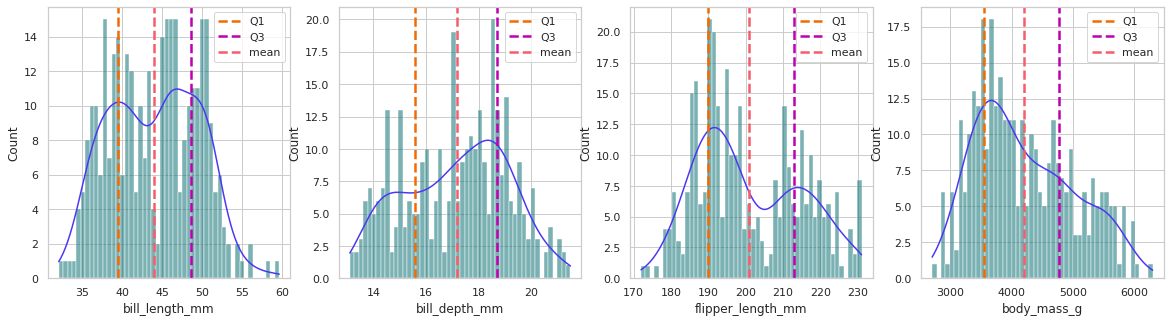

In [15]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
for i,col in enumerate(numerical_statistics):
    sns.histplot( 
        ax=ax[i],
        data=df2,
        x=col,
        palette=penguin_color,
        bins=50,
        alpha=.55,
        color='#0f7175ff',
        kde=True,
        )
    ax[i].lines[0].set_color('#4c36f5')

    ax[i].axvline(
        x=numerical_statistics.iloc[:,i:i+1].loc['25%'][0],
        color='#f26a02',
        linestyle='dashed',
        linewidth=2.5,
        label='Q1'
    ) 
    ax[i].axvline(
        x=numerical_statistics.iloc[:,i:i+1].loc['75%'][0],
        color='#bd00b0',
        linestyle='dashed',
        linewidth=2.5,
        label='Q3'
    )
    ax[i].axvline(
        x=numerical_statistics.iloc[:,i:i+1].loc['mean'][0],
        color='#f75c6b',
        linestyle='dashed',
        linewidth=2.5,
        label='mean',
    )
    ax[i].legend()


	

### Partial conclutions

From the graphs, we can conclude:
- The variables **bill_length_mm, bill_ depth_m, flipper_length_mm** tend to be a bimodal distribution.
- As for the variable body_mass_g, it tends to be a positively Skewed Distribution.

## Categorical analysis

### See the basic statistics from the categorical data

In [16]:
df2.describe(include='category')

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

### Categorical variables count visualization

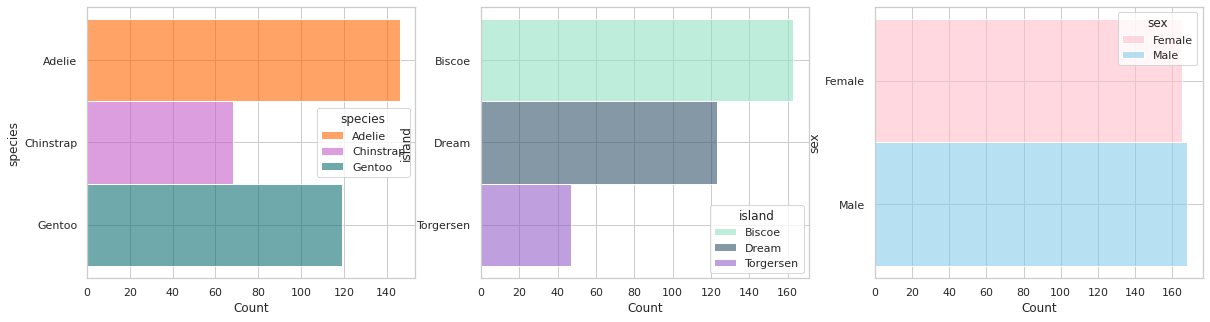

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i,category in enumerate(category_columns):
    sns.histplot(
        ax=ax[i], 
        data=df2,
        y=category,
        hue=category,
        palette=penguin_color,
        alpha=0.6
    )
    

$
\begin{matrix}
\text{SPECIES}   & count &&&&  & \text{ISLAND} & count &&&& \text{SEX}  & count\\
Adelie           & 146   &&&&  & Biscoe        & 163   &&&& Male        & 168  \\
Gentoo           & 119   &&&&  & Dream         & 123   &&&& Female      & 165  \\
Chinstrap        & 68    &&&&  & Torgersen     & 47    &&&&                    \\
\end{matrix}
$

#### Partial conclutions
- In the previous graph, it is seen that the data of the species and the islands are not balanced, except for the sex of the penguins, which is balanced.

###  Categorical variables proportion visualization

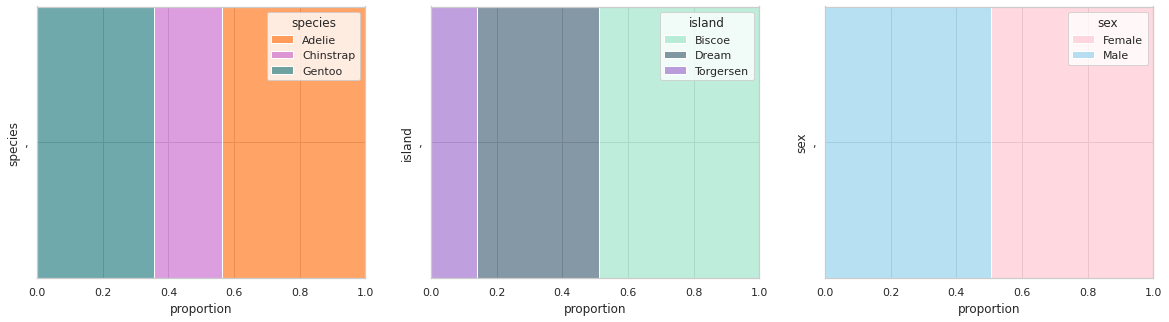

In [18]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i,category in enumerate(category_columns):
    sns.histplot(
        ax=ax[i],
        data=df2.add_column(category[i],',').reset_index(),
        y=category[i],
        palette=penguin_color,
        multiple='fill',
        stat='count',
        hue=category,
        alpha=0.6
    )
    ax[i].set(ylabel=category, xlabel='proportion')

    


$
\begin{matrix}
\text{SPECIES}   & proportion  &&&&  & \text{ISLAND} & proportion &&&& \text{SEX}  & proportion\\
Adelie           & 43.84\%     &&&&  & Biscoe        & 48.94\%    &&&& Male        & 50.45\%     \\
Gentoo           & 35.73\%     &&&&  & Dream         & 36.93\%    &&&& Female      & 49.54\%     \\
Chinstrap        & 20.42\%     &&&&  & Torgersen     & 14.11\%    &&&& \\
\\
\end{matrix}
$


The proportion of penguins between the Adelie and Gentoo species is similar, however there is a smaller number of Chinstraps

The same situation occurs with the islands, where we have the highest concentration of penguins on Biscoe Island, followed by Dream and Torsergen with the fewest records.

####  Partial Conclusions

From the previous calculus several things can be concluded:

- The proportion of species and islands is similar.
- More than 40% of the penguins are of the Adelie species.
- Nearly 50% of the penguins inhabit Biscoe Island.

# Data exploration: Bivariate Analysis

## Numerical & Categorical analysis

Prepare filters for analysis


In [19]:
male = df2.sex == 'Male'
female = ~male

adelie = df2.species == 'Adelie'
chinstrap = df2.species == 'Chinstrap'
gentoo = df2.species == 'Gentoo'

torgersen = df2.island == 'Torgersen'
dream = df2.island == 'Dream'
biscoe = df2.island == 'Biscoe'

species = [adelie,chinstrap,gentoo]
islands = [torgersen,dream,biscoe]
sex = [male, female]

###  Analysis of penguin features

####  Penguin features statistics 

In [20]:
df2.groupby(['species','island']).agg(['min','mean','max',]).dropna()

bill_length_mm                  bill_depth_mm             \
                               min       mean   max           min       mean   
species   island                                                               
Adelie    Biscoe              34.5  38.975000  45.6          16.0  18.370455   
          Dream               32.1  38.520000  44.1          15.5  18.240000   
          Torgersen           33.5  39.038298  46.0          15.9  18.451064   
Chinstrap Dream               40.9  48.833824  58.0          16.4  18.420588   
Gentoo    Biscoe              40.9  47.568067  59.6          13.1  14.996639   

                          flipper_length_mm                    body_mass_g  \
                      max               min        mean    max         min   
species   island                                                             
Adelie    Biscoe     21.1             172.0  188.795455  203.0      2850.0   
          Dream      21.2             178.0  189.927273  208.0      2900.0   
          Torgersen  21.5             176.0  191.531915  210.0      2900.0   
Chinstrap Dream      20.8             178.0  195.823529  212.0      2700.0   
Gentoo    Biscoe     17.3             203.0  217.235294  231.0      3950.0   

                                          
                            mean     max  
species   island                          
Adelie    Biscoe     3709.659091  4775.0  
          Dream      3701.363636  4650.0  
          Torgersen  3708.510638  4700.0  
Chinstrap Dream      3733.088235  4800.0  
Gentoo    Biscoe     5092.436975  6300.0

#### Penguin features visualization:

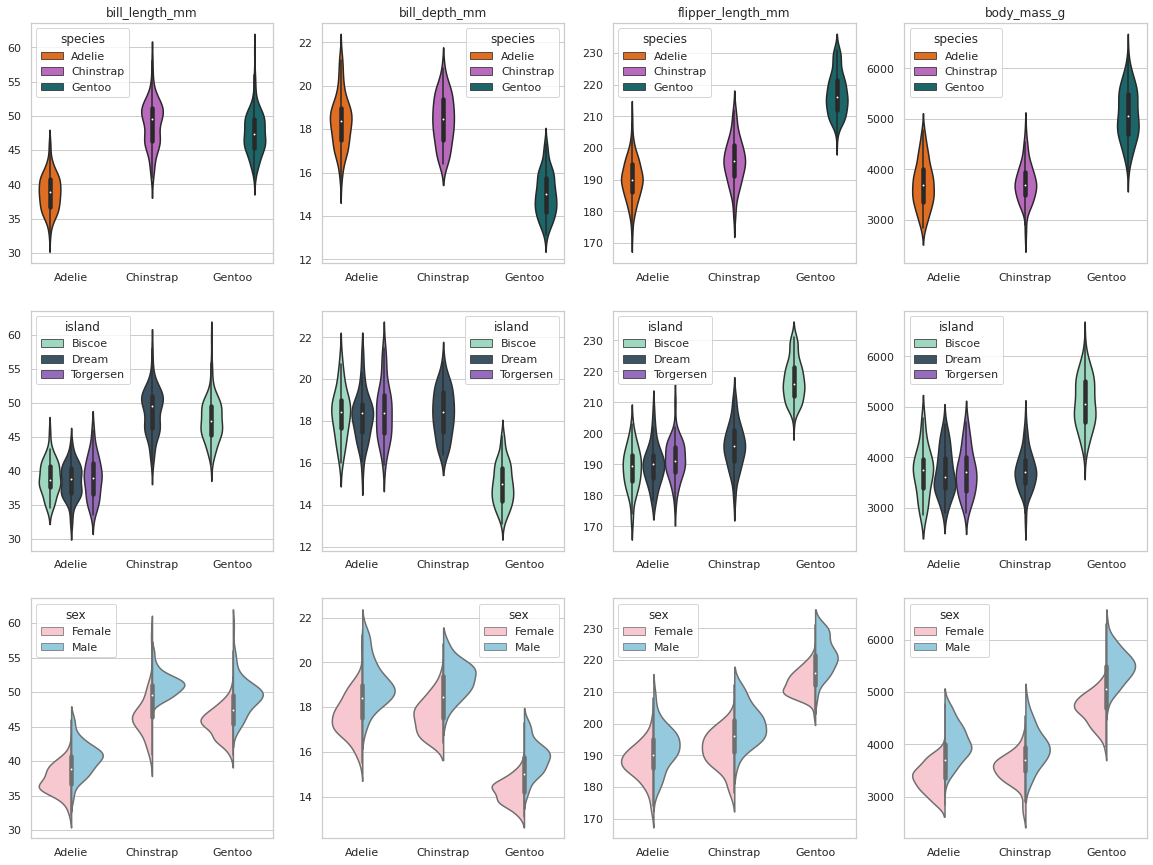

In [21]:
fig,ax = plt.subplots(3,len(numeric_columns), figsize=(20,15))

for i, i_col in enumerate(category_columns):
    for j, j_col in enumerate(numeric_columns):
        sns.violinplot(
            split=True if i == 2 else False,
            ax=ax[i][j],
            data=df2,
            x='species',
            y=j_col,
            hue=i_col,
            palette=penguin_color,
            )
        ax[i][j].set_title(j_col) if i ==0 else None
        ax[i][j].set_xlabel(None)
        ax[i][j].set_ylabel(None)

#### Conclusions

**Adelie penguins:**
1. They are present on all three islands.
1. Adelies are smaller than the Chinstrap and Gentoo species. Except for the depth of its bill.
1. Its flipper and bill, both long and wide, are longer on Torgersen Island than its species
1. They tend to be heavier on Biscoe Island.

**Chinstrap penguins:**
1. Its only found on Dream Island.
1. Chinstrap penguins have longer wings and are heavier than Adelie penguins but less than the Gentoo penguins.
1. The length of its bill is similar to the Adelie penguin, but it is wider than the Gentoo penguin.

**Gentoo penguins:**

1. Its only located on Biscoe Island.
1. They are heaviest than the other species.
1. They have longer flippers than the other species.
1. Gentoo penguins have the longest bill and the thinnest at the same time

In all species, males were bigger than females. But it was discovered a female chinstrap penguin had longer flippers than other males from the same species.

### Analysis of penguin distribution

#### General distribution

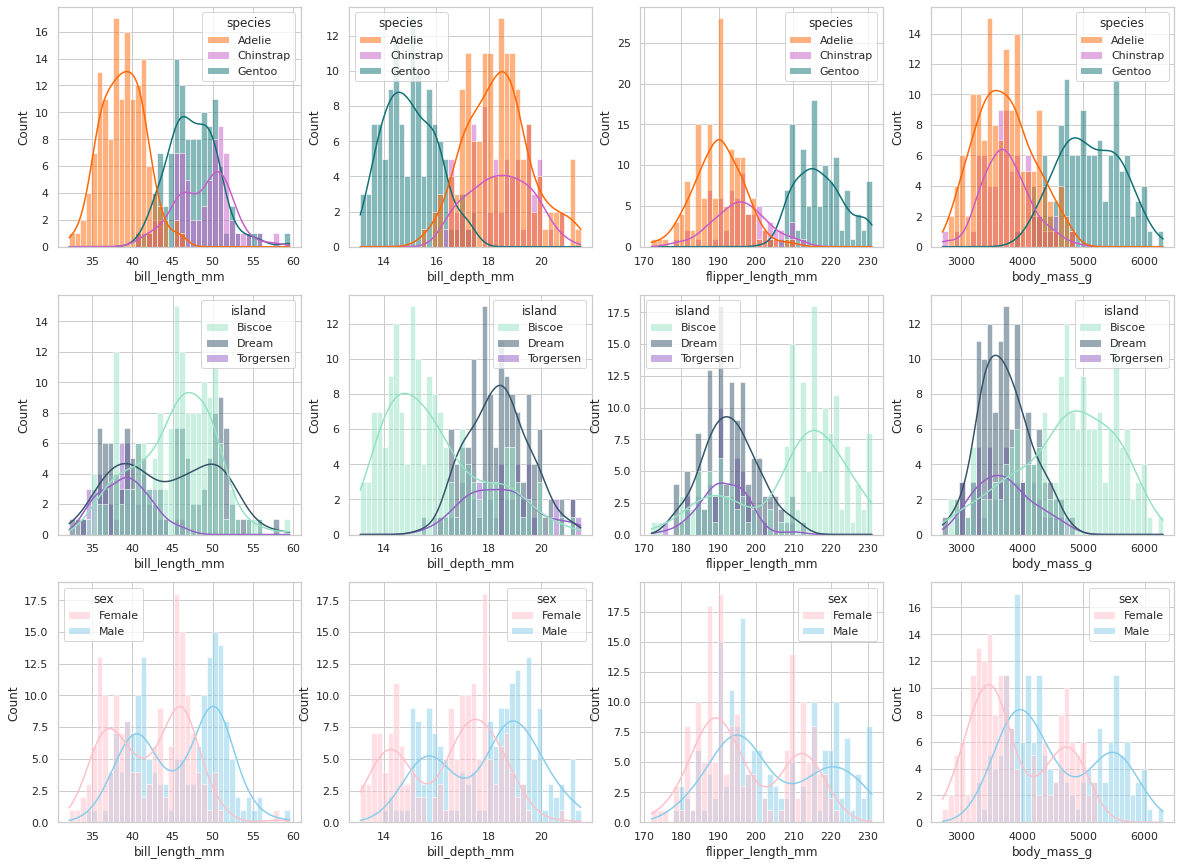

In [22]:
fig,ax = plt.subplots(3,len(numeric_columns), figsize=(20,15))

for i, i_col in enumerate(category_columns):
    for j, j_col in enumerate(numeric_columns):
        sns.histplot( 
            ax=ax[i][j],
            data=df2,
            x=j_col,
            hue=i_col,
            bins=40,
            kde=True,
            palette=penguin_color,
            )

#####  **Partial Conclusions**

**With the last graph, we can conclude that:**

1. The species category is the one that most closely corresponds to a normal distribution.
1. Biscoe Island has a bimodal trend.
1. Dream Island appears to follow a normal distribution except for the variable bill length, which tends to have a bimodal distribution.
1. Torgersen Island tends to have a normal distribution.
1. The sex of penguins has a bimodal tendency.

**Data insights**

- Biases in the species category may arise from the difference in values between sexes of the same species.
- Bimodal trends in the island category may be suggesting the presence of more than one penguin per island.
- Bimodal tendencies in sex are due to different species.


#### Individual species distribution

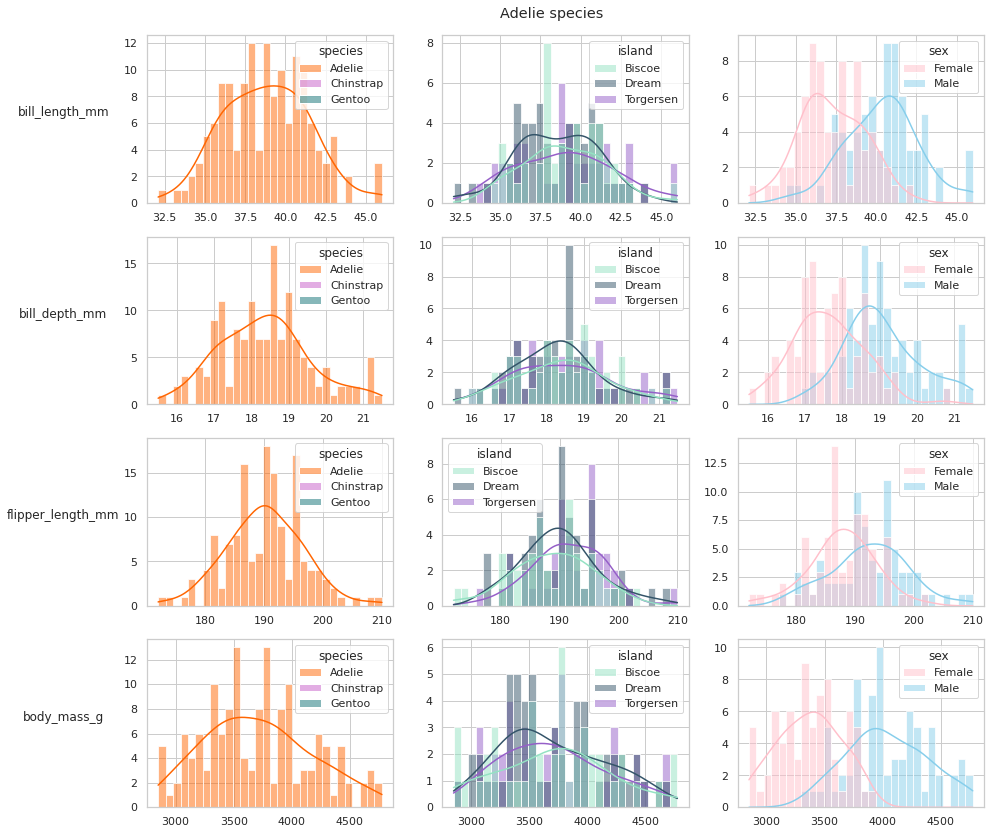

In [23]:
fig,ax = plt.subplots(len(numeric_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numeric_columns):
    for j, j_col in enumerate(category_columns): 
        sns.histplot( 
            ax=ax[i][j],
            data=df2[adelie],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )
            
        ax[i][j].set_ylabel(numeric_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)
        
fig.suptitle('Adelie species');
plt.subplots_adjust(top=0.95);


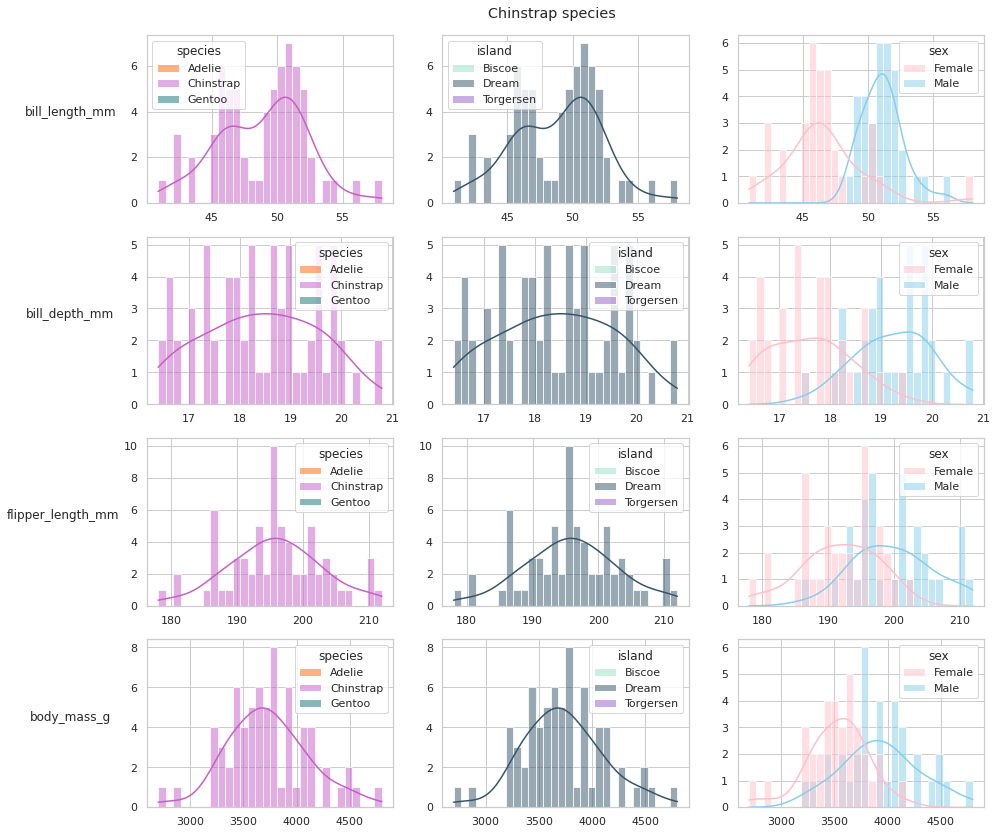

In [24]:
fig,ax = plt.subplots(len(numeric_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numeric_columns):
    for j, j_col in enumerate(category_columns): 
        sns.histplot( 
            ax=ax[i][j],
            data=df2[chinstrap],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )
            
        ax[i][j].set_ylabel(numeric_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

plt.suptitle('Chinstrap species');
plt.subplots_adjust(top=0.95);


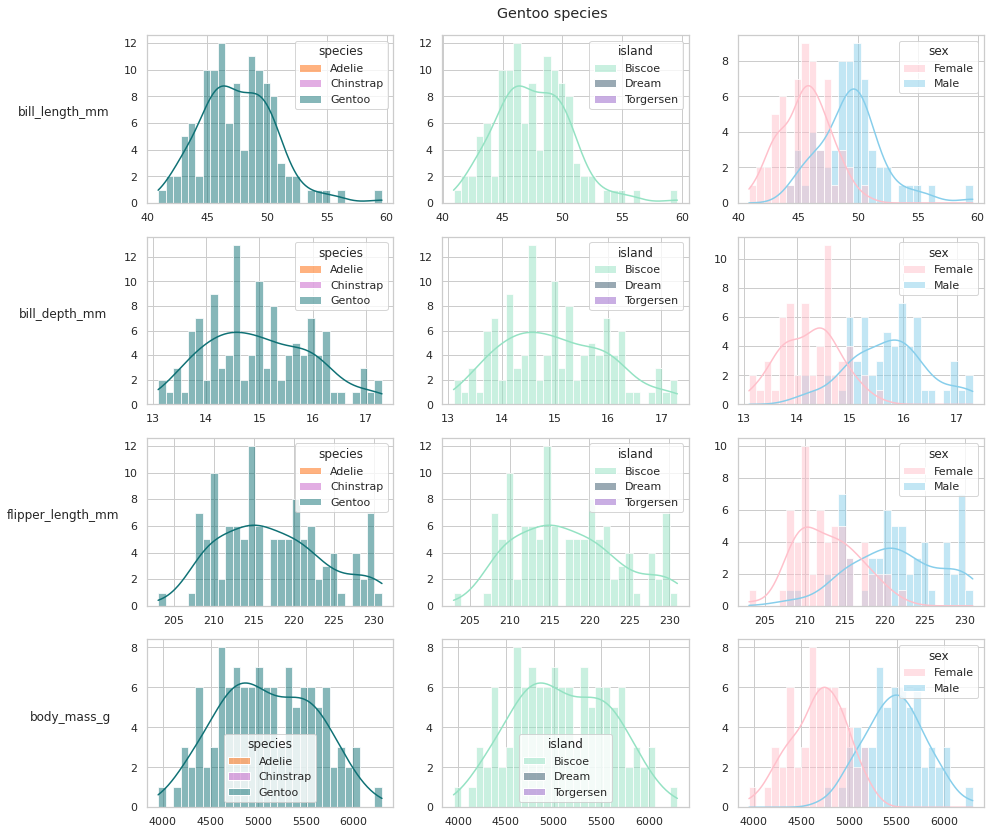

In [25]:
fig,ax = plt.subplots(len(numeric_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numeric_columns):
    for j, j_col in enumerate(category_columns): 
        sns.histplot( 
            ax=ax[i][j],
            data=df2[gentoo],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )
            
        ax[i][j].set_ylabel(numeric_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

plt.suptitle('Gentoo species');
plt.subplots_adjust(top=0.95);

##### Conclusions

When analyzing the characteristics of the penguins by species or island, they tend to have a bimodal distribution, but analyzing it by the sex of the penguin, the numerical variables analyzed mostly found a normal distribution for each species.

## Correlation between variables

### Converting String Values to Numeric Values for analysis of correlation

In [26]:
dummies = pd.get_dummies(df2).iloc[:,4:12]
dummie_df = pd.concat([df2,dummies],axis=1)

In [27]:
dummie_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  species_Adelie  species_Chinstrap  species_Gentoo  \
0         3750.0    Male               1                  0               0   
1         3800.0  Female               1                  0               0   
2         3250.0  Female               1                  0               0   
4         3450.0  Female               1                  0               0   
5         3650.0    Male               1                  0               0   
..           ...     ...             ...                ...             ...   
338       4925.0  Female               0                  0               1   
340       4850.0  Female               0                  0               1   
341       5750.0    Male               0                  0               1   
342       5200.0  Female               0                  0               1   
343       5400.0    Male               0                  0               1   

     island_Biscoe  island_Dream  island_Torgersen  sex_Female  sex_Male  
0                0             0                 1           0         1  
1                0             0                 1           1         0  
2                0             0                 1           1         0  
4                0             0                 1           1         0  
5                0             0                 1           0         1  
..             ...           ...               ...         ...       ...  
338              1             0                 0           1         0  
340              1             0                 0           1         0  
341              1             0                 0           0         1  
342              1             0                 0           1         0  
343              1             0                 0           0         1  

[333 rows x 15 columns]

### Correlation Matrix

<AxesSubplot:>

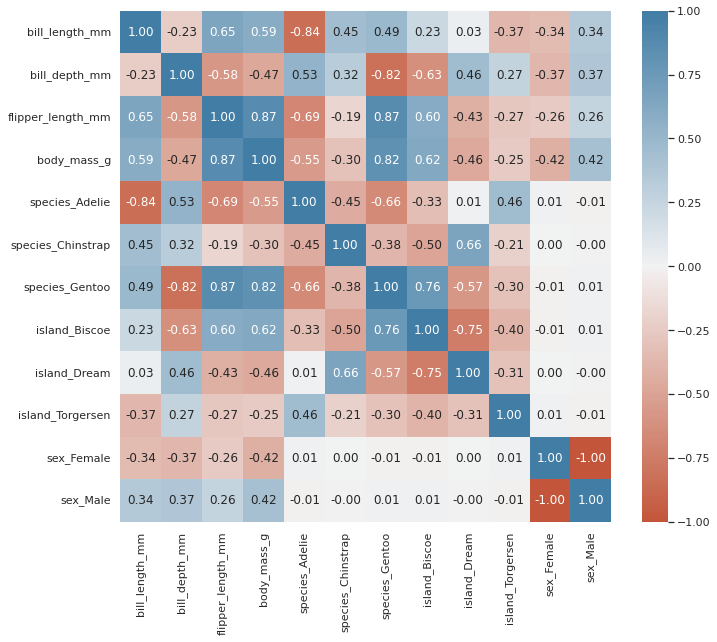

In [28]:
sns.heatmap(
    data=dummie_df.corr(),
    annot=True,
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    fmt='.2f'
    )

#### Interpreting The Heatmap

**POSITIVE CORRELATION:** If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.\
**NEGATIVE CORRELATION:** If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.


Del grafico anterior podemos ver que las especies de pinguinos se encuentran fuertemente correlacionadas con un incremento de sus partes o decremento de la misma

Tambien estan presentes algunas correlaciones interesantes por isla ya fuerte correlacion positiva y negativa dependiendo la especie o caracteristicas de los pinguinos.

El sexo nos da algunos insights de correlaciones debiles tanto positivas como negativas que pueden sernos de utilidad.

# Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:


Previously we had eight penguins with information from all their characteristics but not their sex.

So now we will predict the sex of those penguins using a logistic classification algorithm with all insights gained from EDA

Missing data:

In [29]:
df[missing_data]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

Import libraries for predictive model

In [30]:
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

If you remember, the distribution of our penguins was unbalanced. If we do not fix this, it could lead to gender prediction bias.

In [31]:
print(f'''
Proportion Penguins
{((dummie_df['species'].value_counts()/len(dummie_df)).sort_values(ascending=False))}
''')


Proportion Penguins
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64



To correct this, we will do a stratified sampling, where we will have balanced the proportion of our penguins.

In [32]:
# Stratified Sampling Function
def data_strat(dummie_df, strat_columns_name, strat_values, prop_strat, random_state=None):
    
    df_estrat = pd.DataFrame(columns=dummie_df.columns) # Create an empty data frame with the names of the columns of dummie_df
    
    pos = -1
    for i in range(len(strat_values)): # Iterate over the input of stratified values
        pos += 1
        if pos == len(strat_values) -1:
            ratio_len = len(dummie_df) - len(df_estrat) # Calculates the number of output values having the same number of rows as input
        else:
            ratio_len = int(len(dummie_df) * prop_strat[i]) # calculates the number of rows according to the desired ratio
        
        df_filter = dummie_df[dummie_df[strat_columns_name] == strat_values[i]] # filters the source data based on the values selected in the data layer
        df_temp = df_filter.sample(replace=True, n=ratio_len, random_state=random_state) # sample the filtered data using the ratio we have calculated

        df_estrat = pd.concat([df_estrat, df_temp]) # concat the sample tables with the stratified one to produce the final result

    return df_estrat # Return the stratified, re-sampled data  

We define the proportions of the penguins for sampling

In [33]:
strat_values = ['Adelie','Chinstrap','Gentoo']

In [34]:
strat_prop = [0.333, 0.333, 0.333]

In [35]:
df_strat = data_strat(dummie_df, 'species',strat_values, strat_prop, random_state = 42)

In [36]:
print(f'''
Proportion sample penguins
{((df_strat['species'].value_counts()/len(df_strat)).sort_values(ascending=False))}
''')


Proportion sample penguins
Gentoo       0.339339
Adelie       0.330330
Chinstrap    0.330330
Name: species, dtype: float64



Logistic regression predictive model.

In [37]:
train,test = train_test_split(dummie_df, train_size=0.5, random_state=1)

for i,i_col in enumerate(test.iloc[:,7:15]):
    test[i_col] = pd.to_numeric(test[i_col])
    train[i_col] = pd.to_numeric(train[i_col])

In [258]:
logit_model = logit(
    formula='sex_Male ~ flipper_length_mm + body_mass_g + bill_length_mm + bill_depth_mm + species_Adelie + species_Chinstrap + species_Gentoo + island_Biscoe + island_Dream + island_Torgersen',
    data=train
).fit()

test_predict = logit_model.predict(test).round()

Optimization terminated successfully.
         Current function value: 0.109936
         Iterations 12


Model Accuracy

In [259]:
accuracy_score(
    test.sex_Male,
    test_predict
)

0.9101796407185628

Confusion matrix

<AxesSubplot:title={'center':'Confusion Matrix'}>

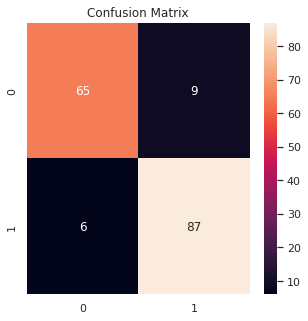

In [260]:
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(
    confusion_matrix(test['sex_Male'], test_predict),
    annot=True
)

Our model was able to predict the sex of the penguins with 90% accuracy. Now, we will use the same model to predict the sex of the eight penguins that used all their characteristics but not their sex.

Missing values from the original dataset

In [261]:
df[missing_data]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g     sex  
3            NaN     NaN  
8         3475.0  Female  
9         4250.0    Male  
10        3300.0  Female  
11        3700.0  Female  
47        2975.0  Female  
246       4100.0  Female  
286       4650.0  Female  
324       4725.0  Female  
336       4875.0  Female  
339          NaN     NaN

Prediction of missing data

In [262]:
logit_model = logit(
    formula=formula,
    data=dummie_df
).fit()

prediction_sex = logit_model.predict(pd.get_dummies(df[missing_data])).round()
prediction_sex = pd.DataFrame(prediction_sex, columns=['sex'])
prediction_sex = prediction_sex.replace([0,1],['Female','Male'])
prediction_sex = prediction_sex.astype({'sex': 'category',}) 
df.loc[prediction_sex.index,'sex'] = prediction_sex.sex

Optimization terminated successfully.
         Current function value: 0.189260
         Iterations 9


In [263]:
df[missing_data]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g     sex  
3            NaN     NaN  
8         3475.0  Female  
9         4250.0    Male  
10        3300.0  Female  
11        3700.0  Female  
47        2975.0  Female  
246       4100.0  Female  
286       4650.0  Female  
324       4725.0  Female  
336       4875.0  Female  
339          NaN     NaN

As we can see, only the two penguins for whom we do not have data remained unclassified.

**Observations:**

- The main features that can help us to identify the sex of a penguin are the flipper length, body mass, species and dimensions of the bill.

- The island gives us a little more precision when it comes to inferring the sex of the penguin, but having this information or not does not harm the model.